In [0]:
#!gdown https://drive.google.com/uc?id=1UOzBWJUgwdp4Y8o6rdjroaYTg8k8Dtct

Downloading...
From: https://drive.google.com/uc?id=1UOzBWJUgwdp4Y8o6rdjroaYTg8k8Dtct
To: /content/data.zip
184MB [00:02, 70.2MB/s]


In [0]:
#!unzip -q data.zip

In [1]:
import numpy as np
from scipy.io import wavfile
from IPython.display import Audio
from os import listdir
from matplotlib import pyplot as plt

In [12]:
filename0 = "data/cat/004ae714_nohash_0.wav"
fs, wav = wavfile.read(filename0)

16000


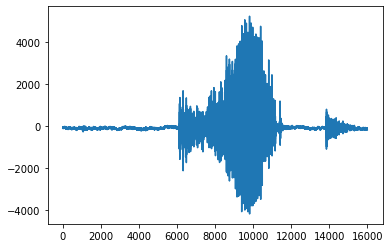

In [13]:
print(fs)
plt.plot(wav)

In [11]:
Audio(filename0)

In [41]:
filename1 = "data/yes/0a9f9af7_nohash_1.wav"
fs, wav = wavfile.read(filename1)

16000


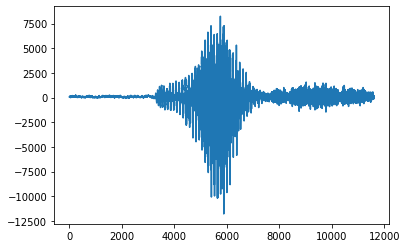

In [42]:
print(fs)
plt.plot(wav)

In [43]:
Audio(filename1)

In [16]:
yes_list = listdir("data/yes")
yes_wav = np.zeros((len(yes_list),16000))
i = 0
for file in yes_list:
  fs, wav = wavfile.read("data/yes/"+file)
  if len(wav) < 16000:
    z = np.zeros((16000-len(wav),))
    wav = np.append(wav, z)
  yes_wav[i,:] = wav
  i = i + 1

In [17]:
yes_list = listdir("data/yes")
print(yes_list[0:5])
print(len(yes_list))

['47565088_nohash_0.wav', '122c5aa7_nohash_1.wav', '8d9cc260_nohash_2.wav', '28ce0c58_nohash_0.wav', 'cd7f8c1b_nohash_3.wav']
2377


In [18]:
print(yes_wav[0:5])

[[   5.    8.    6. ...    0.    0.    0.]
 [   3.   14.   20. ...   18.   18.   28.]
 [ 201.  219.  206. ...  194.  208.  275.]
 [ -11.  -20.  -57. ... -279. -235.  -94.]
 [  35.   31.   21. ...  174.  186.  238.]]


In [19]:
classes = {}
classes["yes"] = listdir("data/yes/")
classes["no"] = listdir("data/no/")
classes["cat"] = listdir("data/cat/")
classes["dog"] = listdir("data/dog")

In [20]:
vocab = ["yes", "no", "cat", "dog"]
all_labels = np.empty((0,1))
all_wav = np.zeros((8231,16000))
i = 0
for c in vocab:
  label = np.full((len(classes[c]),1),vocab.index(c))
  all_labels = np.append(all_labels,label,axis=0)
  for file in classes[c]:
    fs, wav = wavfile.read("data/"+c+"/"+file)
    if len(wav) < 16000:
      wav = np.append(wav,np.zeros((16000-len(wav),)))
    all_wav[i,:] = wav.reshape((1,16000))
    i = i+1

In [21]:
all_wav = all_wav.reshape(-1,16000,1)

In [22]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'keras'

In [23]:
labels_oh = to_categorical(all_labels)

NameError: name 'to_categorical' is not defined

In [24]:
print(labels_oh[8000,:])

NameError: name 'labels_oh' is not defined

In [25]:
x_train, x_valid, y_train, y_valid = train_test_split(all_wav, labels_oh, stratify=labels_oh, test_size=0.2,shuffle=True)

NameError: name 'train_test_split' is not defined

In [26]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Model, load_model
from keras.layers import Dense, Dropout, Input, Conv1D, MaxPooling1D
from keras.layers import GRU, Bidirectional, BatchNormalization, Reshape

ModuleNotFoundError: No module named 'keras'

In [27]:
inputs = Input(shape=(16000,1))
x = BatchNormalization()(inputs)
#First Conv1D layer
x = Conv1D(8,13, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Dropout(0.3)(x)
#Second Conv1D layer
x = Conv1D(16, 11, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Dropout(0.3)(x)
#Third Conv1D layer
x = Conv1D(32, 9, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Dropout(0.3)(x)
#Bidirectional GRU layers
x = BatchNormalization()(x)
x = Bidirectional(GRU(128, return_sequences=True), merge_mode='sum')(x)
x = Bidirectional(GRU(128, return_sequences=True), merge_mode='sum')(x)
x = Bidirectional(GRU(128, return_sequences=False), merge_mode='sum')(x)
x = BatchNormalization()(x)
#Dense Layer 1
x = Dense(256, activation='relu')(x)
outputs = Dense(4, activation="softmax")(x)
model = Model(inputs, outputs)
model.summary()

NameError: name 'Input' is not defined

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

NameError: name 'model' is not defined

In [29]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15, min_delta=0.0001)

NameError: name 'EarlyStopping' is not defined

In [30]:
hist = model.fit(x=x_train, y=y_train, epochs=15, callbacks=[early_stop], batch_size=32, validation_data=(x_valid,y_valid))

NameError: name 'model' is not defined

In [31]:
model.save("speech2text.hdf5")

NameError: name 'model' is not defined

In [32]:
!gdown https://drive.google.com/uc?id=1eqdXKPC1X89-ABrlQ-xlCQS1deIwmyIf

/bin/sh: 1: gdown: not found


In [33]:
model = load_model("speech2text.hdf5")

NameError: name 'load_model' is not defined

In [34]:
def speech_recog(model, vocab, audio, shape_num=16000):
    prob = model.predict(audio.reshape(1,shape_num,1))
    index = np.argmax(prob)
    return vocab[index]

In [35]:
#!pip install sounddevice

In [36]:
#!apt install libportaudio2

In [37]:
#!pip install soundfile

In [38]:
#import sounddevice as sd
#import soundfile as sf

In [39]:
#samplerate = 16000
## the value below must be in seconds  
#duration = 1
#filename = 'recorded_audio.wav'
#print("start")
#mydata = sd.rec(int(samplerate * duration), samplerate=samplerate, channels=1, blocking=True)
#print("end")
#sd.wait()
#sf.write(filename, mydata, samplerate)

In [40]:
fs, test_wav = wavfile.read("/content/data/dog/00b01445_nohash_0.wav")

FileNotFoundError: [Errno 2] No such file or directory: '/content/data/dog/00b01445_nohash_0.wav'

In [0]:
out = speech_recog(model, vocab, test_wav, 16000)
print(out)